In [175]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer,KNNImputer,MissingIndicator

from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,PowerTransformer,OneHotEncoder,OrdinalEncoder

from sklearn.model_selection import train_test_split


In [176]:
pd.set_option('display.max_column',None)

In [177]:
#ensure the output from all the transformations is in pandas dataframe
from sklearn import set_config

set_config(transform_output='pandas')

In [ ]:
original_df = pd.read_csv("../data/interim/02_cleaned_data.csv")

df= original_df.copy()

In [179]:
df

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance,distance_type
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,Sunny,high,2,snack,motorcycle,0.0,no,urban,24,INDO,19,3,Saturday,1,15.0,11.0,morning,3.025149,short
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,Stormy,jam,2,snack,scooter,1.0,no,metropolitian,33,BANG,25,3,Friday,0,5.0,19.0,evening,20.183530,very_long
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,Sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26,BANG,19,3,Saturday,1,15.0,8.0,morning,1.552758,short
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,Sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21,COIMB,5,4,Tuesday,0,10.0,18.0,evening,7.790401,medium
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,Cloudy,high,1,snack,scooter,1.0,no,metropolitian,30,CHEN,26,3,Saturday,1,15.0,13.0,afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,Windy,high,1,meal,motorcycle,0.0,no,metropolitian,32,JAP,24,3,Thursday,0,10.0,11.0,morning,1.489846,short
45498,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,Windy,jam,0,buffet,motorcycle,1.0,no,metropolitian,36,AGR,16,2,Wednesday,0,15.0,19.0,evening,NaN,NaN
45499,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,Cloudy,low,1,drinks,scooter,0.0,no,metropolitian,16,CHEN,11,3,Friday,0,15.0,23.0,night,4.657195,short
45500,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,Cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,26,COIMB,7,3,Monday,0,5.0,13.0,afternoon,6.232393,medium


In [180]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance', 'distance_type'],
      dtype='object')

In [181]:
#dropping unnecessary cols based on eda
df.drop(columns= ['rider_id','restaurant_latitude','restaurant_longitude','delivery_latitude','delivery_longitude','order_date','order_time_hour','order_day'],inplace=True)

In [182]:
df

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,37.0,4.9,Sunny,high,2,snack,motorcycle,0.0,no,urban,24,INDO,3,Saturday,1,15.0,morning,3.025149,short
1,34.0,4.5,Stormy,jam,2,snack,scooter,1.0,no,metropolitian,33,BANG,3,Friday,0,5.0,evening,20.183530,very_long
2,23.0,4.4,Sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26,BANG,3,Saturday,1,15.0,morning,1.552758,short
3,38.0,4.7,Sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21,COIMB,4,Tuesday,0,10.0,evening,7.790401,medium
4,32.0,4.6,Cloudy,high,1,snack,scooter,1.0,no,metropolitian,30,CHEN,3,Saturday,1,15.0,afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,30.0,4.8,Windy,high,1,meal,motorcycle,0.0,no,metropolitian,32,JAP,3,Thursday,0,10.0,morning,1.489846,short
45498,21.0,4.6,Windy,jam,0,buffet,motorcycle,1.0,no,metropolitian,36,AGR,2,Wednesday,0,15.0,evening,NaN,NaN
45499,30.0,4.9,Cloudy,low,1,drinks,scooter,0.0,no,metropolitian,16,CHEN,3,Friday,0,15.0,night,4.657195,short
45500,20.0,4.7,Cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,26,COIMB,3,Monday,0,5.0,afternoon,6.232393,medium


In [183]:
df.isna().sum()

age                    1854
ratings                1908
weather                 525
traffic                 510
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     993
festival                228
city_type              1198
time_taken                0
city_name                 0
order_month               0
order_day_of_week         0
is_weekend                0
pickup_time_minutes    1640
order_time_of_day      1640
distance               3630
distance_type          3630
dtype: int64

In [184]:
df.duplicated().sum()

0

<Axes: >

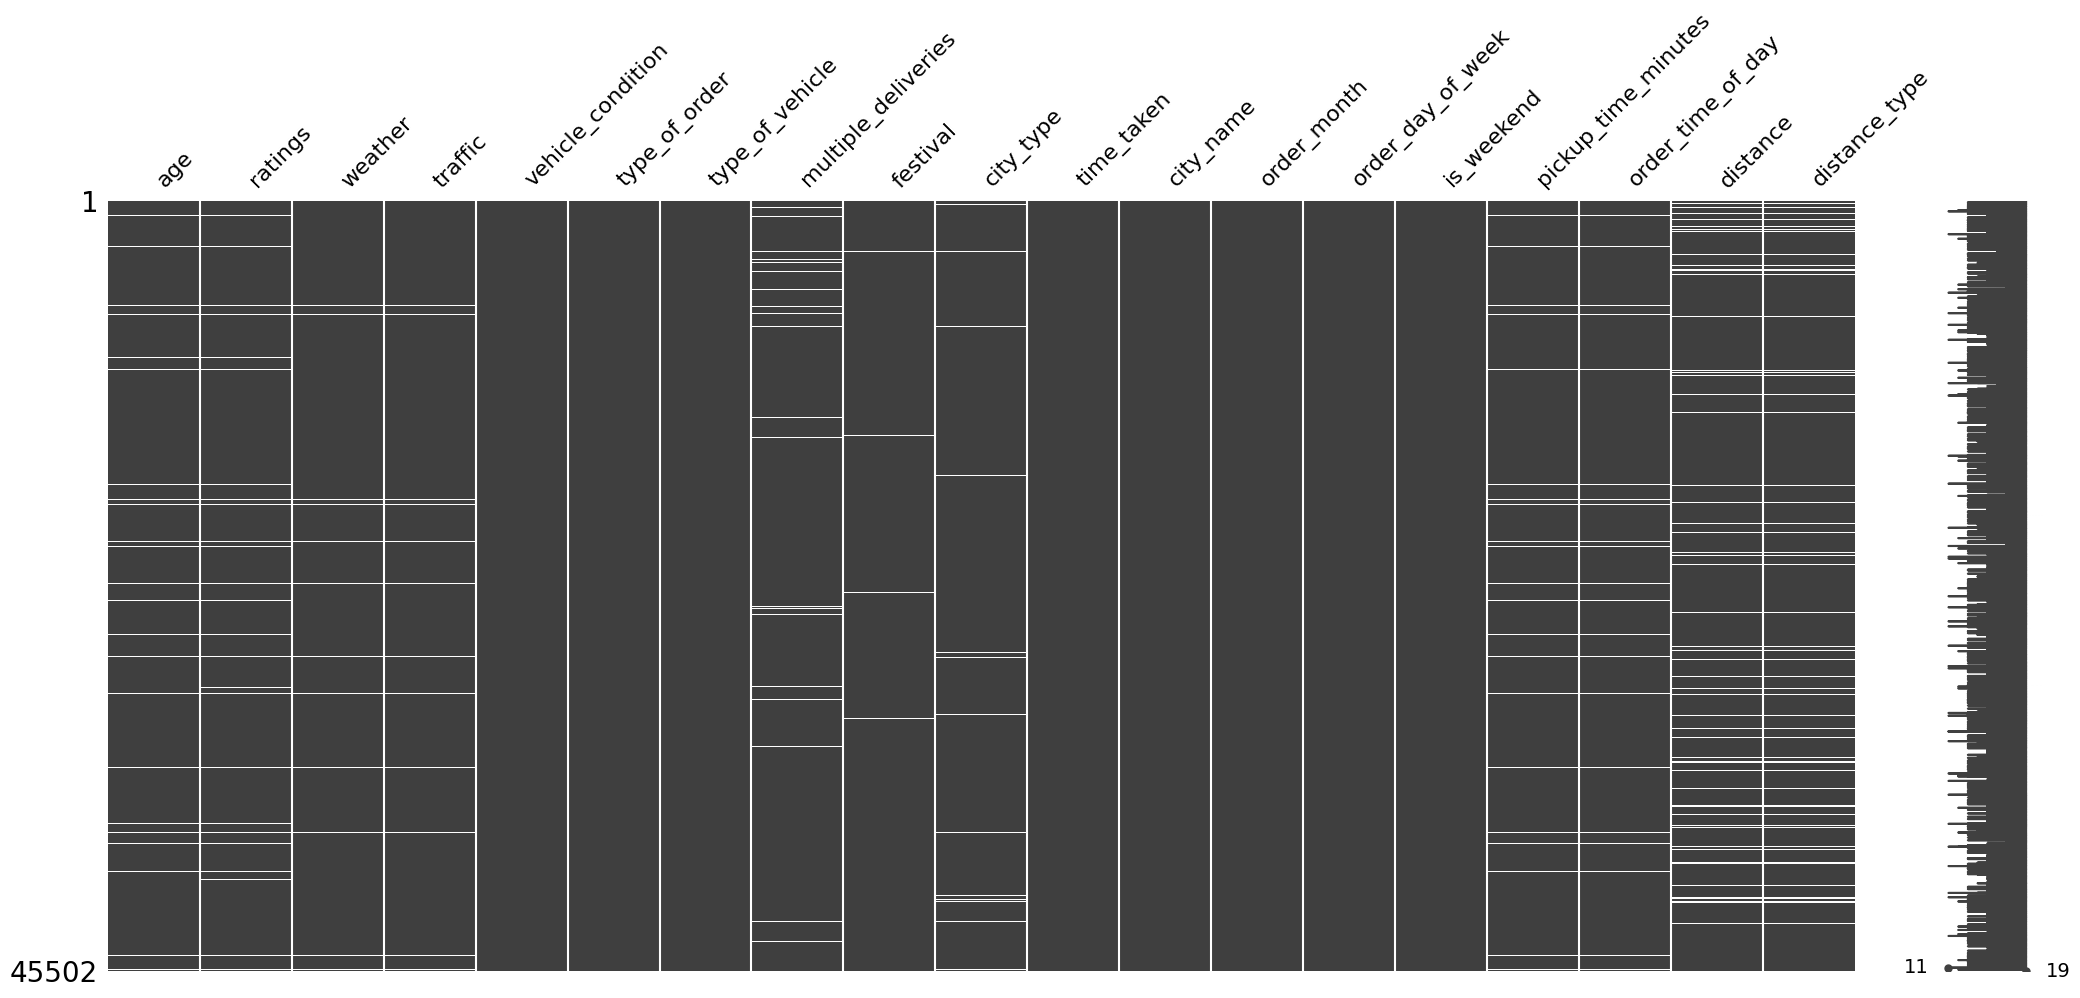

In [185]:
import missingno as msno
msno.matrix(df)

In [186]:
missing_cols = df.isna().any().loc[lambda x: x==True].index

## Making first quick model on data

In [187]:
temp_df = df.copy()
temp_df.dropna(inplace=True)

In [188]:
temp_df

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,37.0,4.9,Sunny,high,2,snack,motorcycle,0.0,no,urban,24,INDO,3,Saturday,1,15.0,morning,3.025149,short
1,34.0,4.5,Stormy,jam,2,snack,scooter,1.0,no,metropolitian,33,BANG,3,Friday,0,5.0,evening,20.183530,very_long
2,23.0,4.4,Sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26,BANG,3,Saturday,1,15.0,morning,1.552758,short
3,38.0,4.7,Sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21,COIMB,4,Tuesday,0,10.0,evening,7.790401,medium
4,32.0,4.6,Cloudy,high,1,snack,scooter,1.0,no,metropolitian,30,CHEN,3,Saturday,1,15.0,afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45496,35.0,4.2,Windy,jam,2,drinks,motorcycle,1.0,no,metropolitian,33,RANCHI,3,Tuesday,0,10.0,night,16.600272,very_long
45497,30.0,4.8,Windy,high,1,meal,motorcycle,0.0,no,metropolitian,32,JAP,3,Thursday,0,10.0,morning,1.489846,short
45499,30.0,4.9,Cloudy,low,1,drinks,scooter,0.0,no,metropolitian,16,CHEN,3,Friday,0,15.0,night,4.657195,short
45500,20.0,4.7,Cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,26,COIMB,3,Monday,0,5.0,afternoon,6.232393,medium


In [189]:
X= temp_df.drop(columns=['time_taken'])
Y= temp_df['time_taken']

X

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,city_name,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,37.0,4.9,Sunny,high,2,snack,motorcycle,0.0,no,urban,INDO,3,Saturday,1,15.0,morning,3.025149,short
1,34.0,4.5,Stormy,jam,2,snack,scooter,1.0,no,metropolitian,BANG,3,Friday,0,5.0,evening,20.183530,very_long
2,23.0,4.4,Sandstorms,low,0,drinks,motorcycle,1.0,no,urban,BANG,3,Saturday,1,15.0,morning,1.552758,short
3,38.0,4.7,Sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,COIMB,4,Tuesday,0,10.0,evening,7.790401,medium
4,32.0,4.6,Cloudy,high,1,snack,scooter,1.0,no,metropolitian,CHEN,3,Saturday,1,15.0,afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45496,35.0,4.2,Windy,jam,2,drinks,motorcycle,1.0,no,metropolitian,RANCHI,3,Tuesday,0,10.0,night,16.600272,very_long
45497,30.0,4.8,Windy,high,1,meal,motorcycle,0.0,no,metropolitian,JAP,3,Thursday,0,10.0,morning,1.489846,short
45499,30.0,4.9,Cloudy,low,1,drinks,scooter,0.0,no,metropolitian,CHEN,3,Friday,0,15.0,night,4.657195,short
45500,20.0,4.7,Cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,COIMB,3,Monday,0,5.0,afternoon,6.232393,medium


In [190]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

print(x_train.shape,x_test.shape)

(30451, 18) (7613, 18)


In [191]:
x_train.columns

Index(['age', 'ratings', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'city_name', 'order_month', 'order_day_of_week',
       'is_weekend', 'pickup_time_minutes', 'order_time_of_day', 'distance',
       'distance_type'],
      dtype='object')

In [192]:
num_cols = ['age','ratings','pickup_time_minutes','distance']

nominal_cat_cols = ['weather','type_of_order','type_of_vehicle','festival','city_type','city_name','order_month','order_day_of_week','order_time_of_day']

ordinal_cat_cols = ['traffic','distance_type']

len(num_cols + nominal_cat_cols + ordinal_cat_cols)

15

In [193]:
total_cols = 0
for col in nominal_cat_cols:
    total_cols= total_cols + x_train[col].nunique() -1
total_cols = total_cols + len(num_cols+ ordinal_cat_cols)
total_cols

52

In [194]:
x_train['weather'].nunique()

6

In [195]:
x_train[['age','ratings','pickup_time_minutes','distance']]

,age,ratings,pickup_time_minutes,distance
11311,35.0,4.3,10.0,7.802839
31063,36.0,4.9,10.0,4.610598
5834,30.0,4.8,5.0,7.761350
39229,25.0,4.5,10.0,7.448311
32763,21.0,4.7,15.0,7.441087
...,...,...,...,...
9358,32.0,4.8,5.0,3.064003
38827,28.0,4.9,10.0,10.867138
6245,38.0,3.5,15.0,19.471573
14523,32.0,4.7,10.0,7.790401


In [196]:
X['traffic'].unique(), X['distance_type'].unique()

(array(['high', 'jam', 'low', 'medium'], dtype=object),
 array(['short', 'very_long', 'medium', 'long'], dtype=object))

In [197]:
traffic_order = ['low','medium','high','jam' ]
distance_type_order = ['short','medium','long','very_long']

In [198]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
preprocessor = ColumnTransformer(
    transformers=[('scale',MinMaxScaler(),num_cols),
    ('nominal_encode',OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False),nominal_cat_cols),
    ('ordinal_encode',OrdinalEncoder(categories = [traffic_order,distance_type_order]),ordinal_cat_cols)
				],
    remainder='passthrough',n_jobs=-1
)

preprocessor.set_output(transform='pandas')

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'city_name',
                                  'order_month', 'order_day_of_week',
                                  'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']]),
                                 ['traffic', 'distance_type'])])

In [199]:
x_train_transformed = preprocessor.fit_transform(x_train)
x_test_transformed = preprocessor.transform(x_test)

In [200]:
x_train_transformed

,scale__age,scale__ratings,scale__pickup_time_minutes,scale__distance,nominal_encode__weather_Fog,nominal_encode__weather_Sandstorms,nominal_encode__weather_Stormy,nominal_encode__weather_Sunny,nominal_encode__weather_Windy,nominal_encode__type_of_order_drinks,nominal_encode__type_of_order_meal,nominal_encode__type_of_order_snack,nominal_encode__type_of_vehicle_motorcycle,nominal_encode__type_of_vehicle_scooter,nominal_encode__festival_yes,nominal_encode__city_type_semi-urban,nominal_encode__city_type_urban,nominal_encode__city_name_ALH,nominal_encode__city_name_AURG,nominal_encode__city_name_BANG,nominal_encode__city_name_BHP,nominal_encode__city_name_CHEN,nominal_encode__city_name_COIMB,nominal_encode__city_name_DEH,nominal_encode__city_name_GOA,nominal_encode__city_name_HYD,nominal_encode__city_name_INDO,nominal_encode__city_name_JAP,nominal_encode__city_name_KNP,nominal_encode__city_name_KOC,nominal_encode__city_name_KOL,nominal_encode__city_name_LUDH,nominal_encode__city_name_MUM,nominal_encode__city_name_MYS,nominal_encode__city_name_PUNE,nominal_encode__city_name_RANCHI,nominal_encode__city_name_SUR,nominal_encode__city_name_VAD,nominal_encode__order_month_3,nominal_encode__order_month_4,nominal_encode__order_day_of_week_Monday,nominal_encode__order_day_of_week_Saturday,nominal_encode__order_day_of_week_Sunday,nominal_encode__order_day_of_week_Thursday,nominal_encode__order_day_of_week_Tuesday,nominal_encode__order_day_of_week_Wednesday,nominal_encode__order_time_of_day_afternoon,nominal_encode__order_time_of_day_evening,nominal_encode__order_time_of_day_morning,nominal_encode__order_time_of_day_night,ordinal_encode__traffic,ordinal_encode__distance_type,remainder__vehicle_condition,remainder__multiple_deliveries,remainder__is_weekend
11311,0.789474,0.72,0.5,0.324940,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0,2.0,1
31063,0.842105,0.96,0.5,0.161273,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,1,1.0,1
5834,0.526316,0.92,0.0,0.322813,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2,0.0,0
39229,0.263158,0.80,0.5,0.306763,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2,0.0,1
32763,0.052632,0.88,1.0,0.306393,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9358,0.631579,0.92,0.0,0.081978,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0.0,0
38827,0.421053,0.96,0.5,0.482048,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0,1.0,1
6245,0.947368,0.40,1.0,0.923201,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2,1.0,0
14523,0.631579,0.88,0.5,0.324303,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [201]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

y_train_pt = pt.fit_transform(X=y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [202]:
y_train_pt

,x0
0,1.671396
1,1.275906
2,-0.773935
3,-1.500599
4,-0.773935
...,...
30446,0.268597
30447,0.164786
30448,0.753969
30449,0.660994


In [203]:
pt.lambdas_

array([0.31807947])

## Train initial baseline model

In [204]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train_transformed,y_train_pt)

LinearRegression()

In [205]:
y_pred_train = lr.predict(x_train_transformed)
y_pred_test = lr.predict(x_test_transformed)

In [206]:
#since we are getting predicted values in tranformed scale -> converting back to original scale

y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [207]:
from sklearn.metrics import mean_absolute_error,r2_score

r2_score_train = r2_score(y_true=y_train,y_pred=y_pred_train_org)
r2_score_test = r2_score(y_true=y_test,y_pred=y_pred_test_org)

train_mae = mean_absolute_error(y_true=y_train, y_pred = y_pred_train_org)
test_mae = mean_absolute_error(y_true=y_test, y_pred = y_pred_test_org)

In [208]:
print(r2_score_train,r2_score_test)

print(train_mae,test_mae)

0.602995974367835 0.5979615392188213
4.678623418341219 4.711537765268484


# Impute missing values

In [209]:
temp_df = df.copy()

In [210]:
X = temp_df.drop(columns = ['time_taken'])
Y =temp_df['time_taken']

In [211]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

print(x_train.shape,y_train.shape)

(36401, 18) (36401,)


In [212]:
x_train.isna().sum()

age                    1500
ratings                1547
weather                 423
traffic                 409
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     798
festival                197
city_type               975
city_name                 0
order_month               0
order_day_of_week         0
is_weekend                0
pickup_time_minutes    1322
order_time_of_day      1322
distance               2892
distance_type          2892
dtype: int64

In [213]:
from sklearn.preprocessing import PowerTransformer

pt= PowerTransformer()
y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))

y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [214]:
y_train_pt.shape

(36401, 1)

In [215]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

In [216]:
#precentage of data missing

x_train.isna().any(axis=1).mean().round(2)*100

16.0

### Age

In [217]:
x_train['age'].describe()

count    34901.000000
mean        29.523567
std          5.768047
min         20.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         39.000000
Name: age, dtype: float64

- Mean and median age almost similar -> using median value to impute as age is discrete column

In [218]:
age_median = x_train['age'].median()
age_median

30.0

<Axes: xlabel='age', ylabel='Density'>

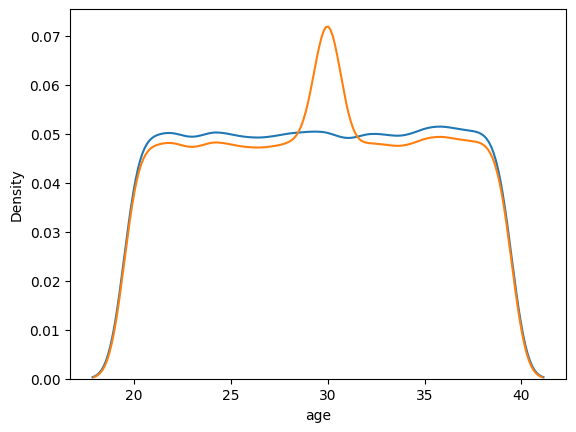

In [219]:
# checking effect of imputation on distribution

sns.kdeplot(data = x_train,x='age')
sns.kdeplot(data=x_train['age'].fillna(age_median))

- It is leading to spike in distribution -> not good
- Try with technique like KNN imputer

## Ratings

In [220]:
# ['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries','festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day', 'distance', 'distance_type']
x_train['ratings'].describe()

count    34854.000000
mean         4.635061
std          0.314314
min          2.500000
25%          4.500000
50%          4.700000
75%          4.900000
max          5.000000
Name: ratings, dtype: float64

<Axes: xlabel='ratings', ylabel='Density'>

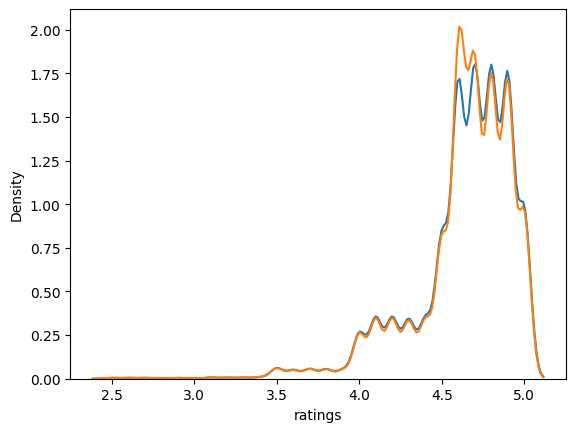

In [221]:
# imputing with mean value and checking distibution
rating_mean = x_train['ratings'].mean()

sns.kdeplot(data = x_train['ratings'])
sns.kdeplot(data=x_train['ratings'].fillna(rating_mean))

- Looks passable
- Can try advance techniques

### Weather

In [222]:
x_train['weather'].value_counts()

weather
Fog           6156
Stormy        6062
Cloudy        6025
Sandstorms    5949
Windy         5918
Sunny         5868
Name: count, dtype: int64

- No dominant category -> cannot impute directly with mode as distibution will change

<Axes: xlabel='count', ylabel='weather'>

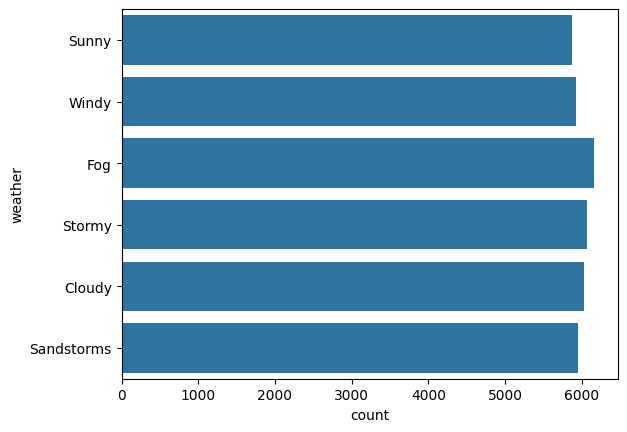

In [223]:
sns.countplot(x_train['weather'])

In [224]:
from sklearn.impute import MissingIndicator

missing_weather = MissingIndicator()
pd.concat([x_train['weather'],missing_weather.fit_transform(x_train[['weather']])],axis=1)

,weather,missingindicator_weather
23571,Sunny,False
35352,Windy,False
7842,Windy,False
31622,Sunny,False
26278,Sunny,False
...,...,...
43723,Cloudy,False
32511,Stormy,False
5192,Cloudy,False
12172,Sandstorms,False


### Traffic

In [225]:
x_train['traffic'].value_counts()

traffic
low       12357
jam       11314
medium     8761
high       3560
Name: count, dtype: int64

In [226]:
x_train['traffic'].isna().sum()

409

- No dominant category -> cannot be directly imputed with mode

### Multiple deliveries

In [227]:
# ['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries','festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day', 'distance', 'distance_type']
x_train['multiple_deliveries'].value_counts()

multiple_deliveries
1.0    22487
0.0    11291
2.0     1548
3.0      277
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='multiple_deliveries'>

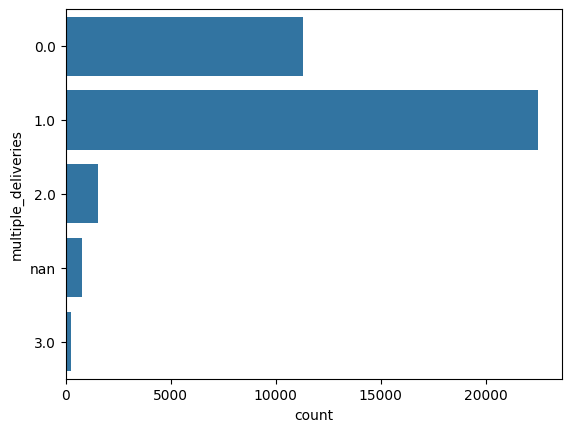

In [228]:
sns.countplot(x_train['multiple_deliveries'].astype(str))

- Mode can be used

In [229]:
multiple_deliveries_mode = x_train['multiple_deliveries'].mode()[0]

<Axes: xlabel='count', ylabel='multiple_deliveries'>

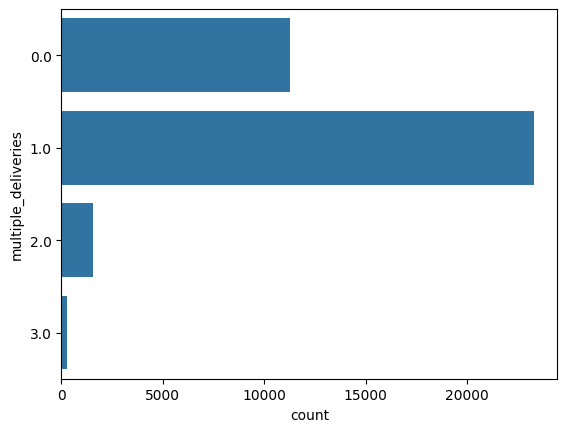

In [230]:

sns.countplot(x_train['multiple_deliveries'].fillna(multiple_deliveries_mode).astype(str))

### Festival

In [231]:
import pandas as pd
x_train['festival'].value_counts(dropna = False)

festival
no     35493
yes      711
NaN      197
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='festival'>

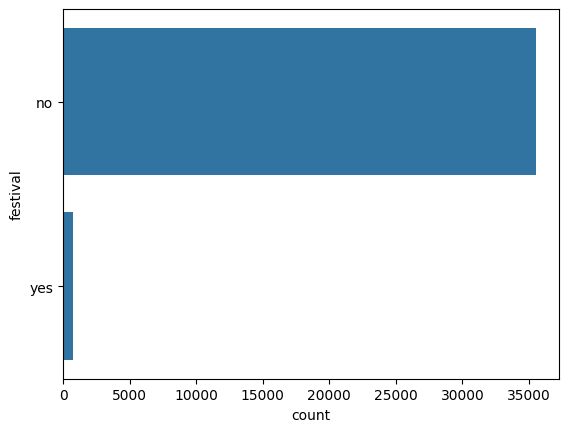

In [232]:
sns.countplot(x_train['festival'])

- No is the dominant category -> mode can be used to impute missing values

In [233]:
festival_mode = x_train['festival'].mode()[0]
festival_mode

'no'

<Axes: xlabel='count', ylabel='festival'>

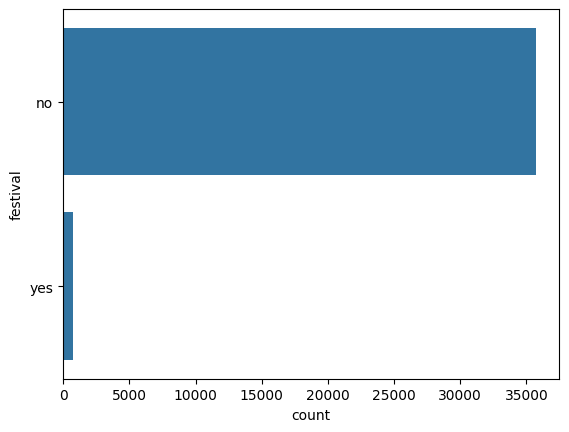

In [234]:
sns.countplot(x_train['festival'].fillna(festival_mode))

### City Type

In [235]:
x_train['city_type'].value_counts(dropna = False)

city_type
metropolitian    27269
urban             8028
NaN                975
semi-urban         129
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='city_type'>

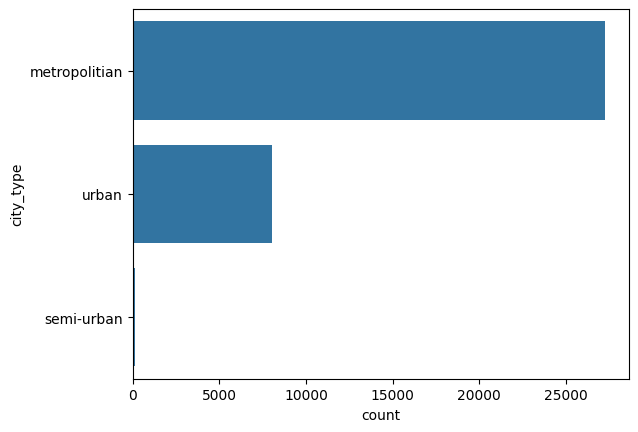

In [236]:
sns.countplot(x_train['city_type'])

In [237]:
city_type_mode = x_train['city_type'].mode()[0]


<Axes: xlabel='count', ylabel='city_type'>

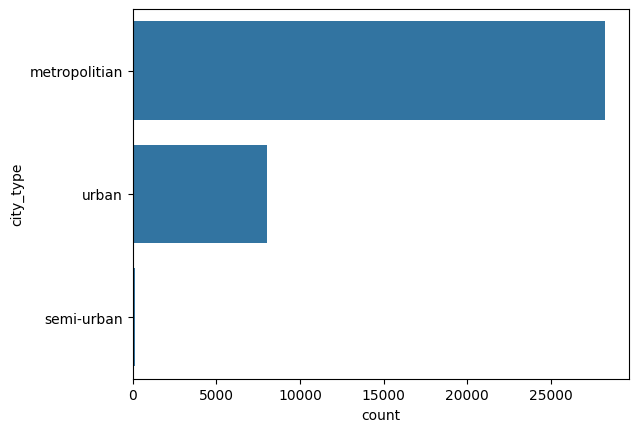

In [238]:
sns.countplot(x_train['city_type'].fillna(city_type_mode))

- Mode can be used to fill na

### Pickup time minutes

In [239]:
x_train['pickup_time_minutes'].describe()

count    35079.000000
mean         9.988882
std          4.090548
min          5.000000
25%          5.000000
50%         10.000000
75%         15.000000
max         15.000000
Name: pickup_time_minutes, dtype: float64

In [240]:
x_train['pickup_time_minutes'].isna().sum()

1322

In [241]:
pickup_time_median = x_train['pickup_time_minutes'].median()

<Axes: xlabel='pickup_time_minutes', ylabel='Density'>

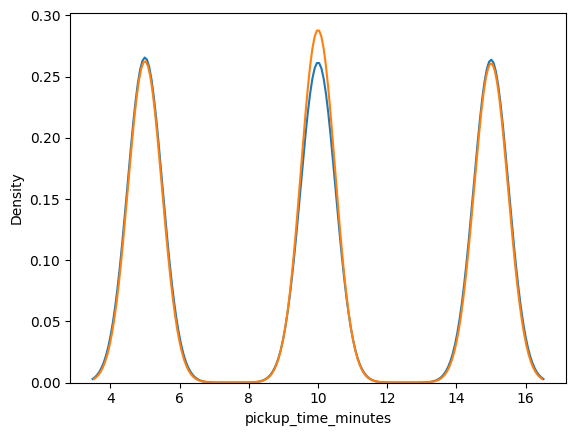

In [242]:
sns.kdeplot(x_train['pickup_time_minutes'])
sns.kdeplot(x_train['pickup_time_minutes'].fillna(pickup_time_median))

- Looks almost same except increase in peak at median value
- Can try advance techniques

### Order time of day

In [243]:
x_train['order_time_of_day'].value_counts(dropna= False)

order_time_of_day
night             14674
evening           10644
morning            6160
afternoon          3249
NaN                1322
after_midnight      352
Name: count, dtype: int64

### Distance

In [244]:
x_train['distance'].describe()

count    33509.000000
mean         9.731656
std          5.608145
min          1.465067
25%          4.657673
50%          9.193021
75%         13.680987
max         20.969489
Name: distance, dtype: float64

In [245]:
distance_mean = x_train['distance'].mean()

<Axes: xlabel='distance', ylabel='Density'>

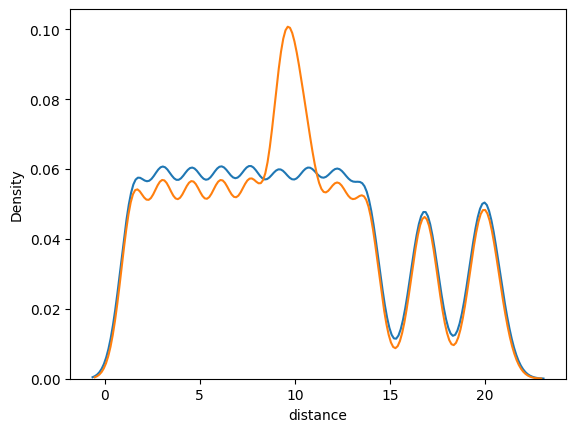

In [246]:
sns.kdeplot(x_train['distance'])
sns.kdeplot(x_train['distance'].fillna(distance_mean))

- Change in distribution 
- Need to try advance techniques

### Distance Type

In [247]:
x_train['distance_type'].value_counts()

distance_type
medium       9034
short        9009
long         9005
very_long    6461
Name: count, dtype: int64

- No dominant category 
- Cannot be directly imputed

## Imputation Pipeline

In [248]:
nominal_cat_cols

['weather',
 'type_of_order',
 'type_of_vehicle',
 'festival',
 'city_type',
 'city_name',
 'order_month',
 'order_day_of_week',
 'order_time_of_day']

In [249]:
x_train.isna().sum()

age                    1500
ratings                1547
weather                 423
traffic                 409
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     798
festival                197
city_type               975
city_name                 0
order_month               0
order_day_of_week         0
is_weekend                0
pickup_time_minutes    1322
order_time_of_day      1322
distance               2892
distance_type          2892
dtype: int64

In [250]:
# nominal categorical features to fill with mode
feature_to_fill_mode = ['multiple_deliveries','city_type']
features_to_fill_missing = [col for col in nominal_cat_cols if col not in feature_to_fill_mode]

In [251]:
#use simple imputer to fill categorical cols with mode
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

simple_imputer = ColumnTransformer(
    transformers=[
        ('mode_imputer',SimpleImputer(strategy='most_frequent'),feature_to_fill_mode),
        ('missing_imputer',SimpleImputer(strategy='constant',fill_value='missing'),features_to_fill_missing)  
				], remainder='passthrough',n_jobs=-1,verbose_feature_names_out=False
)

simple_imputer

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('mode_imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['multiple_deliveries', 'city_type']),
                                ('missing_imputer',
                                 SimpleImputer(fill_value='missing',
                                               strategy='constant'),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_name', 'order_month',
                                  'order_day_of_week', 'order_time_of_day'])],
                  verbose_feature_names_out=False)

In [252]:
simple_imputer.fit_transform(x_train)

,multiple_deliveries,city_type,weather,type_of_order,type_of_vehicle,festival,city_name,order_month,order_day_of_week,order_time_of_day,age,ratings,traffic,vehicle_condition,is_weekend,pickup_time_minutes,distance,distance_type
23571,0.0,metropolitian,Sunny,buffet,motorcycle,no,SUR,3,Saturday,night,21.0,4.7,low,0,1,5.0,4.560891,short
35352,0.0,metropolitian,Windy,meal,motorcycle,no,MUM,4,Monday,night,39.0,4.1,jam,0,0,15.0,16.822156,very_long
7842,0.0,metropolitian,Windy,buffet,motorcycle,no,COIMB,3,Thursday,evening,30.0,4.1,medium,0,0,5.0,4.674181,short
31622,1.0,metropolitian,Sunny,drinks,scooter,no,BANG,4,Sunday,evening,32.0,4.9,medium,1,1,15.0,7.763181,medium
26278,1.0,metropolitian,Sunny,buffet,motorcycle,no,PUNE,3,Sunday,evening,33.0,4.7,jam,2,1,15.0,13.788947,long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,1.0,metropolitian,Cloudy,buffet,motorcycle,no,SUR,3,Monday,night,37.0,4.9,jam,1,0,5.0,9.121090,medium
32511,1.0,metropolitian,Stormy,drinks,scooter,no,CHEN,3,Tuesday,evening,36.0,3.6,medium,1,0,10.0,12.419788,long
5192,0.0,metropolitian,Cloudy,buffet,motorcycle,no,SUR,3,Monday,morning,26.0,4.7,low,1,0,5.0,3.040540,short
12172,1.0,metropolitian,Sandstorms,buffet,motorcycle,no,MUM,4,Saturday,night,32.0,4.2,jam,0,1,10.0,13.765935,long


In [253]:
simple_imputer.fit_transform(x_train).isna().sum()

multiple_deliveries       0
city_type                 0
weather                   0
type_of_order             0
type_of_vehicle           0
festival                  0
city_name                 0
order_month               0
order_day_of_week         0
order_time_of_day         0
age                    1500
ratings                1547
traffic                 409
vehicle_condition         0
is_weekend                0
pickup_time_minutes    1322
distance               2892
distance_type          2892
dtype: int64

In [254]:
# KNN imputer
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)

In [255]:
num_cols = ['age', 'ratings', 'pickup_time_minutes', 'distance']

nominal_cat_cols = ['weather',
 'type_of_order',
 'type_of_vehicle',
 'festival',
 'city_type',
 'city_name',
 'order_month',
 'order_day_of_week',
 'order_time_of_day']

ordinal_cat_cols = ['traffic', 'distance_type']

In [256]:
#do basic preprocessing

traffic_order = ['low','medium','high','jam' ]
distance_type_order = ['short','medium','long','very_long']

In [257]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

preprocessor = ColumnTransformer(
    transformers=[
    ('scale',MinMaxScaler(),num_cols),
    ('nominal_encode',OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False),nominal_cat_cols),
    ('ordinal_encode',OrdinalEncoder(categories = [traffic_order,distance_type_order],encoded_missing_value=-999, handle_unknown='use_encoded_value',unknown_value=-1),ordinal_cat_cols)
				],
    remainder='passthrough',n_jobs=-1
)

preprocessor.set_output(transform='pandas')

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'city_name',
                                  'order_month', 'order_day_of_week',
                                  'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']],
                                                encoded_missing_value=-999,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['traffic', 'distance_type'])])

In [258]:
preprocessor.fit_transform(x_train)

,scale__age,scale__ratings,scale__pickup_time_minutes,scale__distance,nominal_encode__weather_Fog,nominal_encode__weather_Sandstorms,nominal_encode__weather_Stormy,nominal_encode__weather_Sunny,nominal_encode__weather_Windy,nominal_encode__weather_nan,nominal_encode__type_of_order_drinks,nominal_encode__type_of_order_meal,nominal_encode__type_of_order_snack,nominal_encode__type_of_vehicle_electric_scooter,nominal_encode__type_of_vehicle_motorcycle,nominal_encode__type_of_vehicle_scooter,nominal_encode__festival_yes,nominal_encode__festival_nan,nominal_encode__city_type_semi-urban,nominal_encode__city_type_urban,nominal_encode__city_type_nan,nominal_encode__city_name_ALH,nominal_encode__city_name_AURG,nominal_encode__city_name_BANG,nominal_encode__city_name_BHP,nominal_encode__city_name_CHEN,nominal_encode__city_name_COIMB,nominal_encode__city_name_DEH,nominal_encode__city_name_GOA,nominal_encode__city_name_HYD,nominal_encode__city_name_INDO,nominal_encode__city_name_JAP,nominal_encode__city_name_KNP,nominal_encode__city_name_KOC,nominal_encode__city_name_KOL,nominal_encode__city_name_LUDH,nominal_encode__city_name_MUM,nominal_encode__city_name_MYS,nominal_encode__city_name_PUNE,nominal_encode__city_name_RANCHI,nominal_encode__city_name_SUR,nominal_encode__city_name_VAD,nominal_encode__order_month_3,nominal_encode__order_month_4,nominal_encode__order_day_of_week_Monday,nominal_encode__order_day_of_week_Saturday,nominal_encode__order_day_of_week_Sunday,nominal_encode__order_day_of_week_Thursday,nominal_encode__order_day_of_week_Tuesday,nominal_encode__order_day_of_week_Wednesday,nominal_encode__order_time_of_day_afternoon,nominal_encode__order_time_of_day_evening,nominal_encode__order_time_of_day_morning,nominal_encode__order_time_of_day_night,nominal_encode__order_time_of_day_nan,ordinal_encode__traffic,ordinal_encode__distance_type,remainder__vehicle_condition,remainder__multiple_deliveries,remainder__is_weekend
23571,0.052632,0.88,0.0,0.158724,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,1
35352,1.000000,0.64,1.0,0.787364,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,0,0.0,0
7842,0.526316,0.64,0.0,0.164533,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0
31622,0.631579,0.96,1.0,0.322907,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,1.0,1
26278,0.684211,0.88,1.0,0.631851,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,2.0,2,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,0.894737,0.96,0.0,0.392528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1,1.0,0
32511,0.842105,0.44,0.5,0.561653,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1,1.0,0
5192,0.315789,0.88,0.0,0.080775,0.0,0.0,

In [259]:
#building preprocessing pipeline

preprocessing_pipeline = Pipeline( steps = [
    ('simple_imputer',simple_imputer),
    ('preprocess',preprocessor),
    ('knn_imputer',knn_imputer)
])

preprocessing_pipeline

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('simple_imputer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('mode_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['multiple_deliveries',
                                                   'city_type']),
                                                 ('missing_imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant'),
                                                  ['weather', 'type_of_order',
                                                   'type_of_vehicle',
                                                   'festival', 'city_name',
                                                   'order_month',...
                                                   'type_of_vehicle',
                                                   'festival', 'city_type',
                                                   'city_name', 'order_month',
                                                   'order_day_of_week',
                                                   'order_time_of_day']),
                                                 ('ordinal_encode',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high',
                                                                              'jam'],
                                                                             ['short',
                                                                              'medium',
                                                                              'long',
                                                                              'very_long']],
                                                                 encoded_missing_value=-999,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['traffic',
                                                   'distance_type'])])),
                ('knn_imputer', KNNImputer())])

In [260]:
preprocessing_pipeline.fit_transform(x_train)

,scale__age,scale__ratings,scale__pickup_time_minutes,scale__distance,nominal_encode__weather_Fog,nominal_encode__weather_Sandstorms,nominal_encode__weather_Stormy,nominal_encode__weather_Sunny,nominal_encode__weather_Windy,nominal_encode__weather_missing,nominal_encode__type_of_order_drinks,nominal_encode__type_of_order_meal,nominal_encode__type_of_order_snack,nominal_encode__type_of_vehicle_electric_scooter,nominal_encode__type_of_vehicle_motorcycle,nominal_encode__type_of_vehicle_scooter,nominal_encode__festival_no,nominal_encode__festival_yes,nominal_encode__city_type_semi-urban,nominal_encode__city_type_urban,nominal_encode__city_name_ALH,nominal_encode__city_name_AURG,nominal_encode__city_name_BANG,nominal_encode__city_name_BHP,nominal_encode__city_name_CHEN,nominal_encode__city_name_COIMB,nominal_encode__city_name_DEH,nominal_encode__city_name_GOA,nominal_encode__city_name_HYD,nominal_encode__city_name_INDO,nominal_encode__city_name_JAP,nominal_encode__city_name_KNP,nominal_encode__city_name_KOC,nominal_encode__city_name_KOL,nominal_encode__city_name_LUDH,nominal_encode__city_name_MUM,nominal_encode__city_name_MYS,nominal_encode__city_name_PUNE,nominal_encode__city_name_RANCHI,nominal_encode__city_name_SUR,nominal_encode__city_name_VAD,nominal_encode__order_month_3,nominal_encode__order_month_4,nominal_encode__order_day_of_week_Monday,nominal_encode__order_day_of_week_Saturday,nominal_encode__order_day_of_week_Sunday,nominal_encode__order_day_of_week_Thursday,nominal_encode__order_day_of_week_Tuesday,nominal_encode__order_day_of_week_Wednesday,nominal_encode__order_time_of_day_afternoon,nominal_encode__order_time_of_day_evening,nominal_encode__order_time_of_day_missing,nominal_encode__order_time_of_day_morning,nominal_encode__order_time_of_day_night,ordinal_encode__traffic,ordinal_encode__distance_type,remainder__multiple_deliveries,remainder__vehicle_condition,remainder__is_weekend
23571,0.052632,0.88,0.0,0.158724,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
35352,1.000000,0.64,1.0,0.787364,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0,0.0
7842,0.526316,0.64,0.0,0.164533,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
31622,0.631579,0.96,1.0,0.322907,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
26278,0.684211,0.88,1.0,0.631851,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,2.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,0.894737,0.96,0.0,0.392528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,1.0,0.0
32511,0.842105,0.44,0.5,0.561653,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0
5192,0.315789,0.88,0.0,0.080775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [261]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

model_pipe = Pipeline(steps= [
    ('preprocessing',preprocessing_pipeline),
    ('model',lr)
])

model_pipe

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weather',
                                                                    'type_of_order',
                                                                    'type_of_vehicle',
                                                                    'fes...
                                                                    'city_name',
                                                                    'order_month',
                                                                    'order_day_of_week',
                                                                    'order_time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])])),
                                 ('knn_imputer', KNNImputer())])),
                ('model', LinearRegression())])

In [262]:
model_pipe.fit(x_train,y_train_pt)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weather',
                                                                    'type_of_order',
                                                                    'type_of_vehicle',
                                                                    'fes...
                                                                    'city_name',
                                                                    'order_month',
                                                                    'order_day_of_week',
                                                                    'order_time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])])),
                                 ('knn_imputer', KNNImputer())])),
                ('model', LinearRegression())])

In [263]:
x_train.shape , y_train_pt.shape

((36401, 18), (36401, 1))

In [264]:
y_pred_train = model_pipe.predict(x_train)
y_pred_test = model_pipe.predict(x_test)

In [265]:
# get actal predictions

y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [266]:
train_mae_2 = mean_absolute_error(y_true=y_train,y_pred=y_pred_train_org)

test_mae_2= mean_absolute_error(y_true=y_test,y_pred=y_pred_test_org)

(train_mae,test_mae , train_mae,test_mae)

(4.678623418341219, 4.711537765268484, 4.678623418341219, 4.711537765268484)

In [268]:
r2_score_train_2 = r2_score(y_true=y_train,y_pred=y_pred_train_org)

r2_score_test_2 = r2_score(y_true=y_test,y_pred=y_pred_test_org)

(r2_score_train_2,r2_score_test_2 , r2_score_train,r2_score_test)

(0.5836273633644189, 0.5856744002778329, 0.602995974367835, 0.5979615392188213)